In [268]:
import numpy as np
import matplotlib.pyplot as plt

from qutip import sigmax, sigmay, sigmaz, identity, qeye, spre, spost, qpt, qpt_plot_combined, basis
import qutip.logging_utils as logging
import qutip.control.pulseoptim as cpo
from qutip.control.grape import _overlap
from qutip.qip.device import Processor
from qutip.qip.operations import hadamard_transform
from notebooks.qutip_wrapper import qutip_simulate_wrapper

In [269]:
logger = logging.get_logger()
# Set this to None or logging.WARN for 'quiet' execution
log_level = logging.WARN

# Fidelity error target
fid_err_targ = 1e-10
# Maximum iterations for the optimisation algorithm
max_iter = 250
# Maximum (elapsed) time allowed in seconds
max_wall_time = 120
# Minimum gradient (sum of gradients squared)
# as this tends to 0 -> local minima has been found
min_grad = 1e-20  # Fidelity error target

# pulse type alternatives: RND|ZERO|LIN|SINE|SQUARE|SAW|TRIANGLE|
p_type = 'RND'

n_ts = 16#0 * 10
evo_time = np.pi * 2

In [270]:
# H_d = 0 * sigmaz()

# H_c = [sigmax(), sigmay()]

#Detuning instead of phase
omegad0 = 31919806.545849085
freq_est = 4974450442.586346

wq0 = 2 * np.pi * freq_est
delta = wq0 /16


In [271]:
H_d = sigmaz() * 0
U_0 = identity(2)


In [272]:
n_ts = 1600
evo_time = n_ts * .2e-9
H_d = delta * (1 - sigmaz()) / 2
H_c = [omegad0 * sigmax()]

In [273]:
U_targ = sigmax()

In [274]:
result = cpo.optimize_pulse_unitary(H_d, H_c, U_0, U_targ, n_ts, evo_time,
                                    fid_err_targ=fid_err_targ, min_grad=min_grad,
                                    max_iter=max_iter, max_wall_time=max_wall_time,
                                    out_file_ext=None, init_pulse_type=p_type,
                                    log_level=log_level, gen_stats=True, amp_lbound=-1, amp_ubound=1)

In [275]:
result.evo_full_final
U = U_targ
_overlap(U, result.evo_full_final).real, abs(_overlap(U, result.evo_full_final))**2

(-0.9994040528264638, 0.9999999999981719)

In [276]:
sim_result.states[-1]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.99634853+0.j        ]
 [0.        +0.08537916j]]

In [277]:
op_basis = [[qeye(2), sigmax(), sigmay(), sigmaz()]]
op_label = [["i", "x", "y", "z"]]

In [278]:
U = sigmax()
# U = sigmaz()
# U = hadamard_transform(1)
U

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

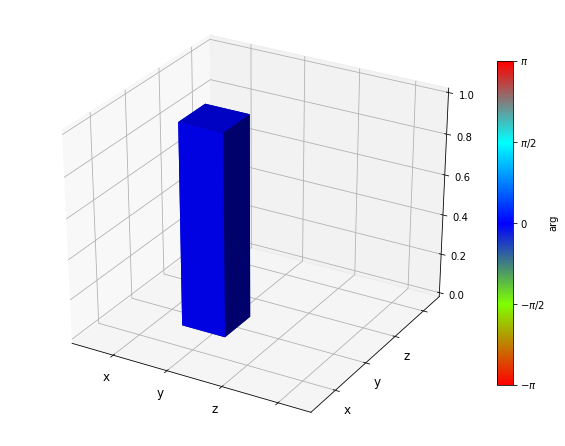

In [279]:
fig = plt.figure(figsize=(8,6))

U_ideal = spre(U) * spost(U.dag())

chi = qpt(U_ideal, op_basis)

fig = qpt_plot_combined(chi, op_label, fig=fig, threshold=0.001)

## Gate calculated using GRAPE

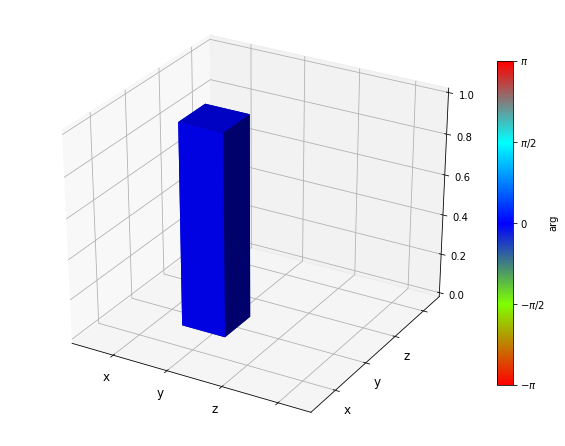

In [280]:
fig = plt.figure(figsize=(8,6))

U_ideal = spre(result.evo_full_final) * spost(result.evo_full_final.dag())

chi = qpt(U_ideal, op_basis)

fig = qpt_plot_combined(chi, op_label, fig=fig, threshold=0.001)

## Versions

In [281]:
# from qutip.ipynbtools import version_table

# version_table()

In [282]:

processor = Processor(N=1)


processor.add_control(H_d, targets=0, label="sigmaz")
# processor.add_control(0.5 * sigmay(), targets=0, label="sigmay")
processor.add_control(H_c[0], targets=0, label="sigmax")
processor.add_control(H_c[1], targets=0, label="sigmay")

dt = evo_time / n_ts
coef = result.final_amps
tlist = np.array([dt * i for i in range(len(coef) + 1)])

# processor.pulses[1].coeff = coef
# processor.pulses[1].tlist = tlist
processor.pulses[0].coeff = coef
processor.pulses[0].tlist = tlist
# for pulse in processor.pulses:
# pulse.print_info()

basis0 = basis(2, 0)
result = processor.run_state(init_state=basis0)
# result.states[-1].tidyup(1.e-5)
# result.states
# basis(2,0)

print(result.states[-1].tidyup(1.e-5))

IndexError: list index out of range

In [ ]:
delta=1
dt = evo_time/n_ts
processor = Processor(N=1)
# H_d = 1 * sigmaz()

processor.add_control(H_d, targets=0, label="sigmaz")
# processor.add_control(0.5 * sigmay(), targets=0, label="sigmay")
processor.add_control(H_c[0], targets=0, label="sigmax")

coef = [a[0] for a in result.final_amps]
tlist = np.array([dt * i for i in range(len(coef) + 1)])

processor.pulses[1].coeff = coef
processor.pulses[1].tlist = tlist
# for pulse in processor.pulses:
# pulse.print_info()

basis0 = basis(2, 0)
sim_result = processor.run_state(init_state=basis0)
print(sim_result.states[-1].tidyup(1.e-5))